In [2]:
!pip install roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="NdpSexkFPZehzW5h4rTE")
project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
version = project.version(1)
dataset = version.download("coco")                

loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.__dict__

{'name': 'Self Driving Car',
 'version': '1',
 'model_format': 'coco',
 'location': 'C:\\Users\\AliHa\\selfdriving\\Self-Driving-Car-1'}

In [8]:
dataset.location

'C:\\Users\\AliHa\\selfdriving\\Self-Driving-Car-1'

# Data Loading

Lets load the data

In [11]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches # For bounding boxes
from PIL import Image
from collections import defaultdict
import json
import os

plt.rcParams['figure.figsize'] = (15,15)

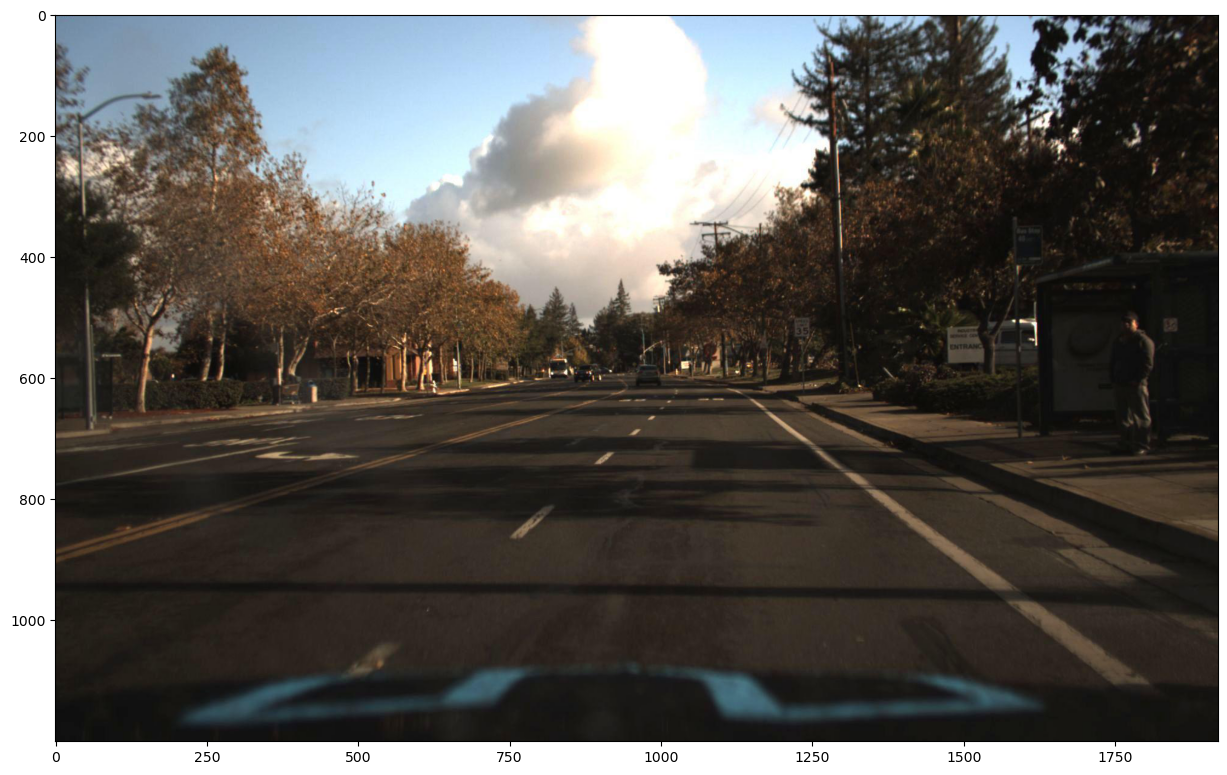

In [13]:
img_loc = os.path.join(dataset.location, 'export')
image_name = os.path.join(img_loc, '1478019952686311006_jpg.rf.8AtteKyLJUNzZ2fEpxRj.jpg')

img = Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

## Get annotations for image

Get mapping images_id -> [annotiation_objects]
and mapping category_id -> category_name

In [16]:
image_ids_annotations = defaultdict(list)
path = os.path.join(img_loc, '_annotations.coco.json')
file = open(path)
anns = json.load(file)

for ann in anns['annotations']:
    image_id = ann['image_id']
    image_ids_annotations[image_id].append(ann)

In [18]:
category_id_to_name = dict()
for ann in anns['categories']:
    category_id_to_name[ann['id']] = ann['name']

In [20]:
img_id_to_name = dict()
for img in anns['images']:
    img_id_to_name[img['id']] = img['file_name']

In [22]:
img_id_to_name

{0: '1478899068416446329_jpg.rf.67e8368b484c1019270e3d9e340c2e1f.jpg',
 1: '1478899979052408630_jpg.rf.67ff4ddf78eb351565b7c6acc0634c9d.jpg',
 2: '1478896453052157328_jpg.rf.67e168de560dbaae20f7bb484e7c76a8.jpg',
 3: '1478897207154676252_jpg.rf.681c83c490951e7743f79b3a2df68fdb.jpg',
 4: '1478900971382678848_jpg.rf.67e52bd930323137c2c7799fab17a5f5.jpg',
 5: '1478899515736405579_jpg.rf.68071130b1b6e9afc8b1cd3a2260920c.jpg',
 6: '1478732269913581781_jpg.rf.68063a56d6db4cb922f3825e6133ce91.jpg',
 7: '1478899383197857889_jpg.rf.67eacfc66da6ed1a4bbc1d3b4a83f327.jpg',
 8: '1478900172719592549_jpg.rf.680c149682058963d205b8e4b7ab05c0.jpg',
 9: '1478900851983251091_jpg.rf.68209cbb466ed4292e75cb9f1aef5c91.jpg',
 10: '1478896925509187138_jpg.rf.67f1221bbc95f0cf84daf59f331c43f1.jpg',
 11: '1478896213110166357_jpg.rf.68236bd3b1f1abadbe1eed08a1390fe9.jpg',
 12: '1478900723443699812_jpg.rf.680f2a2a9a567f2eb01027072cfec9cb.jpg',
 13: '1478732448840019875_jpg.rf.67e1af7c362f0c1bae9fe02c651e4288.jpg',
 1

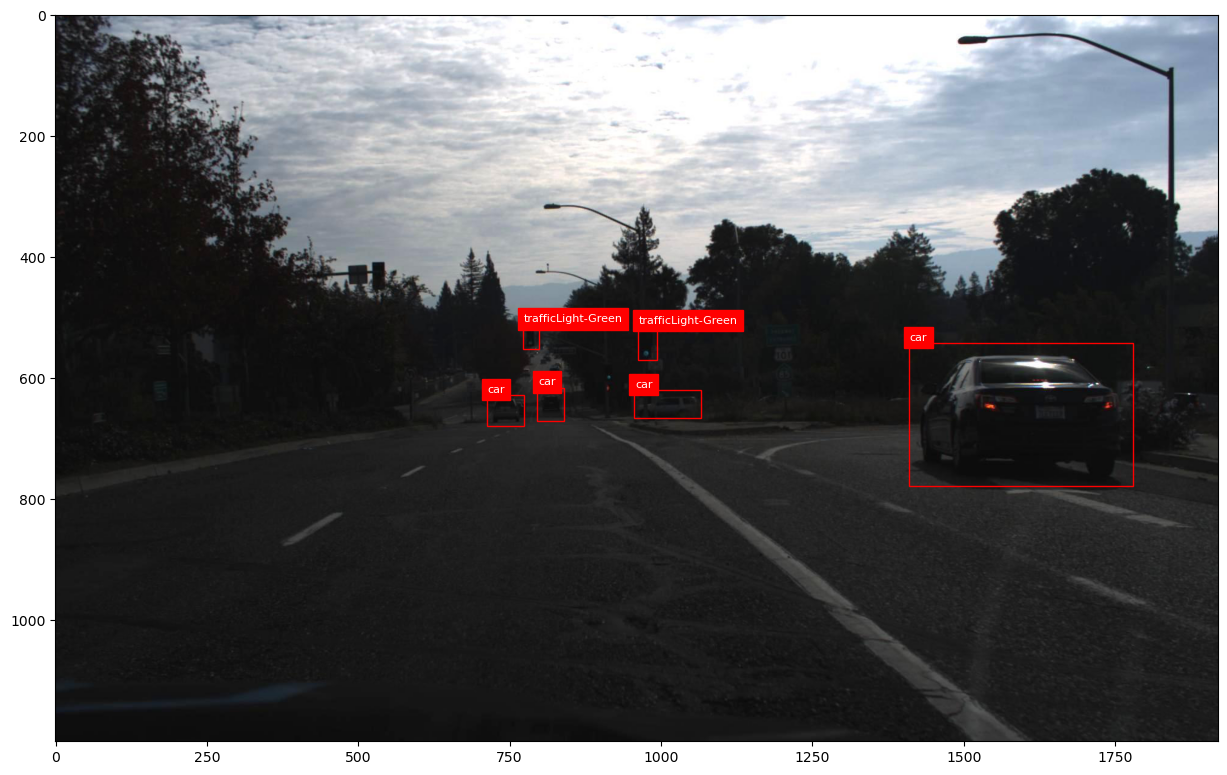

In [24]:
image_id = 0
image_name = img_id_to_name[image_id]
img_path = os.path.join(img_loc, image_name)

img = Image.open(img_path)
fig , ax = plt.subplots()

image_anns = image_ids_annotations[image_id]

for image_ann in image_anns:
    bbox = image_ann['bbox']
    name = category_id_to_name[image_ann['category_id']]

    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    plt.text(x + 1, y - 5, name, fontdict = {'fontsize':8.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor': 'red'})
    bb = patches.Rectangle((x,y), w, h, linewidth = 1, edgecolor='red', facecolor = 'none')
    ax.add_patch(bb)

ax.imshow(img)
plt.show()


In [26]:
print(x,y,w,h)

1410.0 542.0 370.0 236.0


In [28]:
image_ids_annotations

defaultdict(list,
            {0: [{'id': 0,
               'image_id': 0,
               'category_id': 2,
               'bbox': [712, 628, 62, 50],
               'area': 3100,
               'segmentation': [],
               'iscrowd': 0},
              {'id': 1,
               'image_id': 0,
               'category_id': 5,
               'bbox': [772, 512, 26, 40],
               'area': 1040,
               'segmentation': [],
               'iscrowd': 0},
              {'id': 2,
               'image_id': 0,
               'category_id': 2,
               'bbox': [796, 616, 44, 54],
               'area': 2376,
               'segmentation': [],
               'iscrowd': 0},
              {'id': 3,
               'image_id': 0,
               'category_id': 2,
               'bbox': [956, 620, 110, 46],
               'area': 5060,
               'segmentation': [],
               'iscrowd': 0},
              {'id': 4,
               'image_id': 0,
               'category_id'

In [36]:
for image in image_ids_annotations:
    for anno in image_ids_annotations[image]:
        print(anno['bbox'])
    break

[712, 628, 62, 50]
[772, 512, 26, 40]
[796, 616, 44, 54]
[956, 620, 110, 46]
[962, 514, 32, 56]
[1410, 542, 370, 236]


In [48]:
category_counts = defaultdict(int)

for ann in anns['annotations']:
    category_counts[ann['category_id']] += 1


In [54]:
anns['categories']

[{'id': 0, 'name': 'obstacles', 'supercategory': 'none'},
 {'id': 1, 'name': 'biker', 'supercategory': 'obstacles'},
 {'id': 2, 'name': 'car', 'supercategory': 'obstacles'},
 {'id': 3, 'name': 'pedestrian', 'supercategory': 'obstacles'},
 {'id': 4, 'name': 'trafficLight', 'supercategory': 'obstacles'},
 {'id': 5, 'name': 'trafficLight-Green', 'supercategory': 'obstacles'},
 {'id': 6, 'name': 'trafficLight-GreenLeft', 'supercategory': 'obstacles'},
 {'id': 7, 'name': 'trafficLight-Red', 'supercategory': 'obstacles'},
 {'id': 8, 'name': 'trafficLight-RedLeft', 'supercategory': 'obstacles'},
 {'id': 9, 'name': 'trafficLight-Yellow', 'supercategory': 'obstacles'},
 {'id': 10, 'name': 'trafficLight-YellowLeft', 'supercategory': 'obstacles'},
 {'id': 11, 'name': 'truck', 'supercategory': 'obstacles'}]

In [88]:
import pandas as pd
category_counts_df = pd.DataFrame(category_counts.items(), columns = ['category_id','count'])
categories_df = pd.DataFrame(anns['categories'])

In [90]:
category_counts_df = category_counts_df.merge(categories_df, how='left', left_on = 'category_id', right_on = 'id')

In [92]:
category_counts_df

category_id   count  id                     name supercategory
0             2  128798   2                      car     obstacles
1             5   10930   5       trafficLight-Green     obstacles
2             7   13740   7         trafficLight-Red     obstacles
3             3   21612   3               pedestrian     obstacles
4            11    7246  11                    truck     obstacles
5             4    5136   4             trafficLight     obstacles
6             1    3728   1                    biker     obstacles
7             8    3502   8     trafficLight-RedLeft     obstacles
8             9     544   9      trafficLight-Yellow     obstacles
9             6     620   6   trafficLight-GreenLeft     obstacles
10           10      28  10  trafficLight-YellowLeft     obstacles

<Axes: xlabel='count', ylabel='name'>

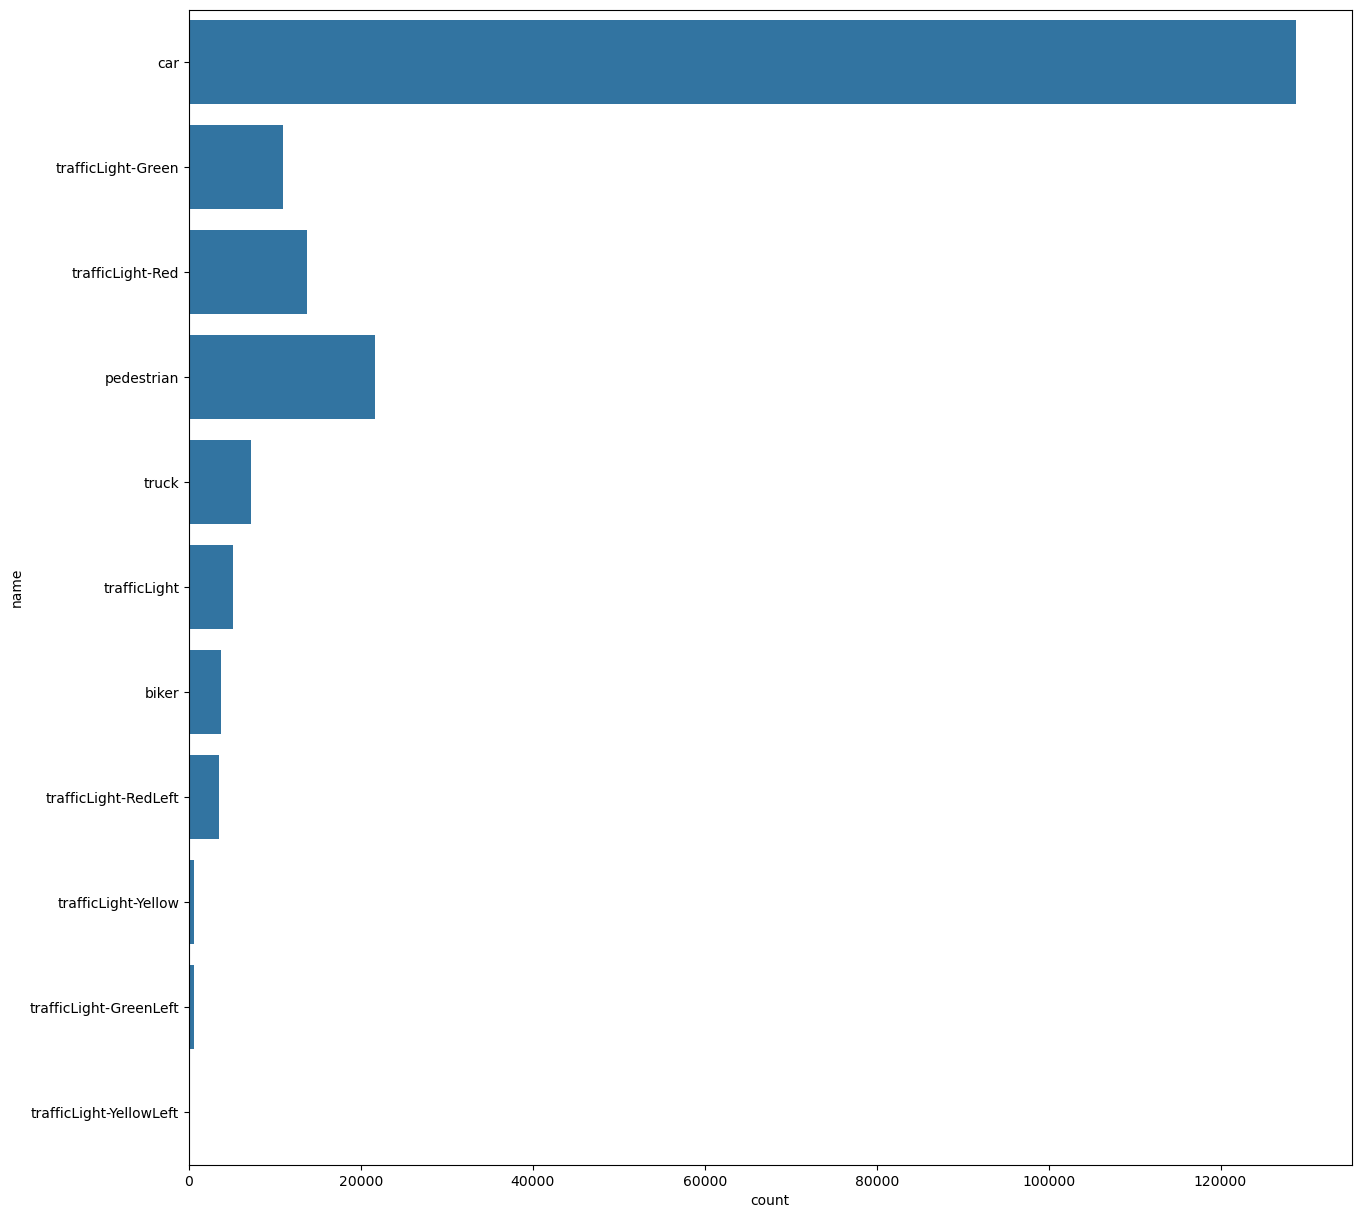

In [106]:
import seaborn as sns

sns.barplot(y="name",x="count", data=category_counts_df)

In [110]:
count_annos_per_image = defaultdict(int)
for image in image_ids_annotations:
    count_annos_per_image[image] = len(image_ids_annotations[image])

In [124]:
count_annos_per_image

defaultdict(int,
            {0: 6,
             1: 8,
             2: 2,
             3: 13,
             4: 4,
             5: 13,
             6: 4,
             7: 10,
             8: 13,
             9: 10,
             10: 6,
             13: 6,
             14: 7,
             15: 6,
             16: 3,
             17: 7,
             18: 4,
             19: 1,
             21: 8,
             22: 5,
             23: 3,
             24: 7,
             25: 12,
             26: 5,
             27: 6,
             28: 6,
             29: 8,
             30: 10,
             31: 2,
             32: 15,
             33: 7,
             34: 2,
             35: 6,
             36: 1,
             37: 4,
             38: 8,
             40: 12,
             41: 19,
             42: 3,
             43: 3,
             44: 1,
             45: 2,
             46: 1,
             47: 1,
             48: 8,
             49: 10,
             51: 10,
             52: 7,
             53: 7,
 

In [128]:
count_annos_per_image_df = pd.DataFrame(count_annos_per_image.items(), columns = ['image_id', 'no_annotations'])

In [130]:
count_annos_per_image_df

image_id  no_annotations
0             0               6
1             1               8
2             2               2
3             3              13
4             4               4
...         ...             ...
26473     29994               9
26474     29995               1
26475     29997              10
26476     29998               4
26477     29999               6

[26478 rows x 2 columns]

<Axes: xlabel='no_annotations', ylabel='Count'>

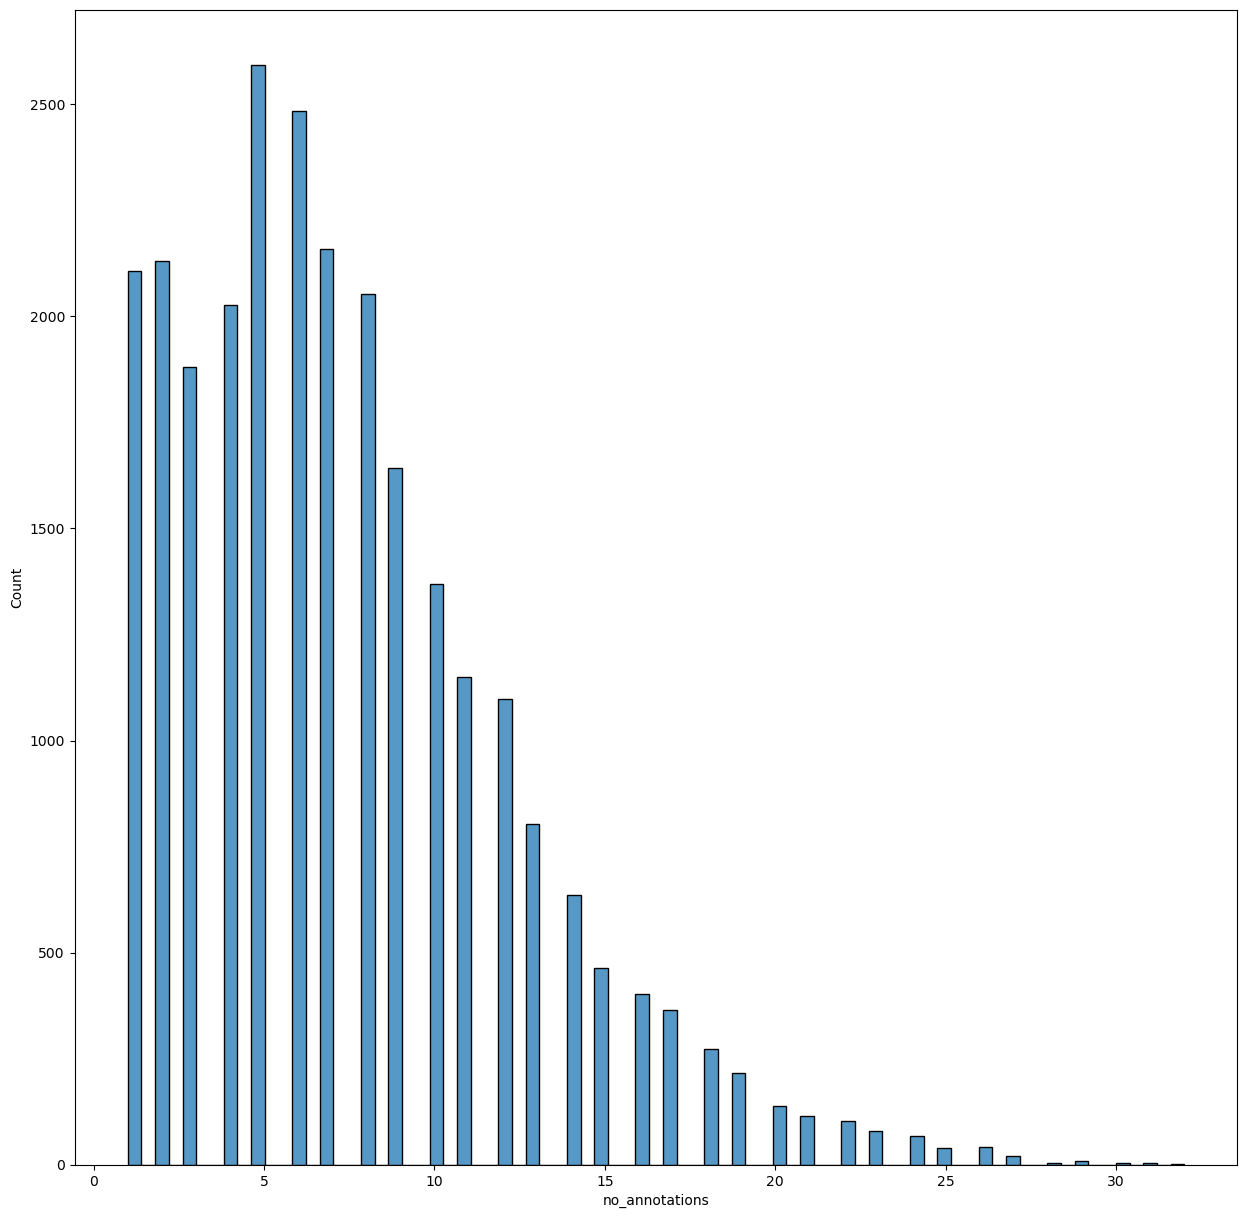

In [132]:
sns.histplot(stat='count',x='no_annotations',data=count_annos_per_image_df)

In [134]:
count_annos_per_image_df['no_annotations'].describe()

count    26478.000000
mean         7.397991
std          4.885036
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         32.000000
Name: no_annotations, dtype: float64

In [ ]:
def iou(bbox1, bbox2):
    tlc_1_x = bbox1[0]
    tlc_1_y = bbox1[1]
    brc_1_x = bbox1[0] + bbox1[2]
    brc_1_y = bbox1[1] + bbox1[3]

    tlc_2_x = bbox2[0]
    tlc_2_y = bbox2[1]
    brc_2_x = bbox2[0] + bbox2[2]
    brc_2_y = bbox2[1] + bbox2[3]

    intersection_tlc_x = max(tlc_1_x, tlc_2_x)
    intersection_tlc_y = max(tlc_1_y, tlc_2_y)

    intersection_brc_x = min(brc_1_x, brc_2_x)
    intersection_brc_y = min(brc_1_y, brc_2_y)

    intersection_area = max(intersection_brc_x - intersection_tlc_x,0) * max(intersection_brc_y - intersection_tlc_y,0)
    union_area = bbox1[2] * bbox1[3] + bbox2[2] * bbox2[3] - intersection_area

    iou_final = intersection_area / union_area

    return intersection_area / union

In [ ]:
import numpy as np
def compute_pairwise_iou_np(boxes):
    remove = set()
    N = boxes.shape[0]
    iou_matrix = np.zeros((N,N))

    for i in range(N):
        for j in range(i+1, N):
            iou_ = iou(boxes[i],boxes[j])
            ious[i,j] = iou_
            ious[j,i] = iou_
            if iou_ == 1:
                remove.add(j)
    return iou_matrix,remove